In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import random,copy,math
import numpy as np
# from deap import benchmarks
import matplotlib.pyplot as plt
# import plotter
import time
pi = round(math.pi,6)



delta_t = 0.2
velocity = 10
target_pos = np.array([100,100])

MAX_POPULATION_SIZE=12 #maximum number of plants in a colony(or population)
sigma_fin=0.01#final standard deviation
sigma_ini=30 #initial standard deviation
Smin=2#min seeds produced
Smax=8#max seeds produced
n_mi= 3 #modulation index
iter_max=1000 #Maximum number of iterations to be done
CHROMOSOME_SIZE=1 #dimension

#class that generates chromosomes
class Chromosome:
    def __init__(self,state ,mode =" "):
        self._genes=np.zeros((CHROMOSOME_SIZE+1),dtype=float)
        self._state = state
        if mode=="initialise":
            i=0
            while i<CHROMOSOME_SIZE:
                self._genes[i]= -(pi/4)+(pi/2)*random.random()
                # print("genes",self._genes)
                i+=1
        self._cost = self.get_cost()
        self._genes[-1] = self._cost

        # self._genes=np.around(self._genes,6)
        #print("TARGET_CHROMOSOME",TARGET_CHROMOSOME,'\n')

    def get_genes(self):
        return self._genes

    def get_cost(self):
        omega = self._genes[0]
        theta = self._state[-1] + (omega*delta_t)
        x = self._state[0] + velocity * math.cos(theta) * delta_t
        y = self._state[1] + velocity * math.sin(theta) * delta_t
        curr_pos = np.array([x,y])
        cost = np.sqrt(np.sum((target_pos-curr_pos)**2))
        self._state = np.array([curr_pos[0],curr_pos[1],theta])
        return cost

    def get_state(self):
        return self._state
    
    def __str__(self):
        return self._genes.__str__()

#class that create one set of generations
class Population:
    def __init__(self,size,curr_state,mode=" "):
        self._chromosomes=[]
        i=0
        while i<size:
            self.add_chromosomes(Chromosome(curr_state,mode))
            i+=1
    def add_chromosomes(self,chromosome):
        self._chromosomes.append(chromosome)
    def get_chromosomes(self):
        return self._chromosomes

#class that helps in evolving and mutating the genes of the chromosomes
class GeneticAlgorithm:

    @staticmethod
    def reproduce(pop,iter,curr_state):
        new_pop=copy.deepcopy(pop)
        worst_cost=pop.get_chromosomes()[MAX_POPULATION_SIZE-1].get_genes()[CHROMOSOME_SIZE]
        best_cost=pop.get_chromosomes()[0].get_genes()[CHROMOSOME_SIZE]
        sigma_iter=GeneticAlgorithm.std_deviation(iter,iter_max)
        if(best_cost!=worst_cost):
            #print("before sorting")
            for i in range(MAX_POPULATION_SIZE):
                ratio=(pop.get_chromosomes()[i].get_genes()[CHROMOSOME_SIZE]-worst_cost)/(best_cost-worst_cost)
                S=Smin+(Smax-Smin)*ratio #number of seeds chromosome can produce on the basis of rank
                for j in range(int(S)):
                    seed=Chromosome(curr_state)
                    for k in range(CHROMOSOME_SIZE):
                        seed._genes[k]=np.random.normal(pop._chromosomes[i].get_genes()[k],sigma_iter)
                    # seed._genes[-1]=seed.get_cost()
                    # seed._genes=np.around(seed._genes,3)
                    new_pop.add_chromosomes(seed)
            GeneticAlgorithm.sort(new_pop)
            pop._chromosomes=new_pop._chromosomes[:MAX_POPULATION_SIZE]
            # for i in range(MAX_POPULATION_SIZE):
            #     pop._chromosomes[i]=new_pop._chromosomes[i]
        else:
            # print("best and worst cost equal")
            return pop, False
        # print("REPRODUCED")
        return pop, True
    @staticmethod
    def std_deviation(iter,iter_max):
        sigma_iter=(((iter_max-iter)**n_mi)/iter_max**n_mi)*(sigma_ini-sigma_fin)+sigma_fin
        # print ("sigma",sigma_iter,'\n')
        return sigma_iter
    @staticmethod
    def sort(pop):
        pop_chroms_2d_array=np.array([pop.get_chromosomes()[i].get_genes() for i in range(len(pop._chromosomes))])
        sindices=np.argsort(pop_chroms_2d_array[:,CHROMOSOME_SIZE],axis=0)
        # sindices = np.flip(sindices)  #To maximize
        sorted_chroms=pop.get_chromosomes()
        for i in range(0,len(pop._chromosomes)):
            sorted_chroms[i]._genes=pop_chroms_2d_array[sindices[i]]
            sorted_chroms[i]._state = pop._chromosomes[sindices[i]]._state
        #for i in range(0,len(pop._chromosomes)):
        pop._chromosomes=sorted_chroms
        # print("SORTED")
#------------------------------------------------------------------------------------------------------------------------------------#-
def _print_population(pop,gen_number,fitness):
    print("\n---------------------------------------------------------")
    print("Generation#",gen_number,"|Fittest chromosome fitness:",pop.get_chromosomes()[0].get_genes()[CHROMOSOME_SIZE])
    #print("Target Chromosome:",TARGET_CHROMOSOME)
    print("-----------------------------------------------------------")
    fitness.append(pop.get_chromosomes()[0].get_genes()[CHROMOSOME_SIZE])
    i=0
    for x in pop.get_chromosomes():
        print("Chromosome #",i+1,":",x.get_state(),"|Fitness:",x.get_genes()[CHROMOSOME_SIZE])
        k=x.get_genes()[CHROMOSOME_SIZE]
        # handle.write(str(gen_number)+' '+str(x.get_genes()[-1])+'\n')
        #fitness=np.append(fitness,[x.get_genes()[CHROMOSOME_SIZE]],1)
        #dplot.update(gen_number,pop.get_chromosomes()[0].get_genes()[CHROMOSOME_SIZE])
        i+=1


def optimizer(curr_state):
  # print("INITIATING PROGRAMME")
  population=Population(MAX_POPULATION_SIZE,curr_state,"initialise")#initialising population
  GeneticAlgorithm.sort(population)
  # print("testcode", population.get_chromosomes()[1].get_state())
  fitness = []
  # _print_population(population,0,fitness)////////////
  iter=1
  # sigma=[GeneticAlgorithm.std_deviation(0,iter_max)]
  # minfit.append(population.get_chromosomes()[-1].get_genes()[-1])
  # print("EVOLUTION STARTED")
  while iter<iter_max:
      # sigma.append(GeneticAlgorithm.std_deviation(iter,iter_max))
      population,check=GeneticAlgorithm.reproduce(population,iter,curr_state)

      if(check==False):
          #iter+=1
          break;
      # minfit.append(population.get_chromosomes()[-1].get_genes()[-1])
      # _print_population(population,iter,fitness)
      iter+=1
  # print(population.get_chromosomes()[0].get_state())
  return(population.get_chromosomes()[0].get_state())




step:  0 state:  [-1.24226922  3.79141076  1.81578843]

step:  1 state:  [-1.43113592  5.78247313  1.6653706 ]

step:  2 state:  [-1.32115119  7.77944669  1.51577621]

step:  3 state:  [-0.90185659  9.73500084  1.3595821 ]

step:  4 state:  [-0.2833647  11.63696502  1.25639632]

step:  5 state:  [ 0.57232728 13.44466833  1.12868805]

step:  6 state:  [ 1.58182225 15.1712024   1.0417069 ]

step:  7 state:  [ 2.83572066 16.72932267  0.89316531]

step:  8 state:  [ 4.29263911 18.09950099  0.75472609]

step:  9 state:  [ 5.81730133 19.39387541  0.70388891]

step:  10 state:  [ 7.34196354 20.68824983  0.70388891]

step:  11 state:  [ 8.86662576 21.98262425  0.70388891]

step:  12 state:  [10.39128797 23.27699866  0.70388891]

step:  13 state:  [11.91410995 24.5735376   0.70530944]

step:  14 state:  [13.43693193 25.87007654  0.70530944]

step:  15 state:  [14.95975391 27.16661548  0.70530944]

step:  16 state:  [16.48187679 28.46397508  0.70584847]

step:  17 state:  [18.00399968 29.761334

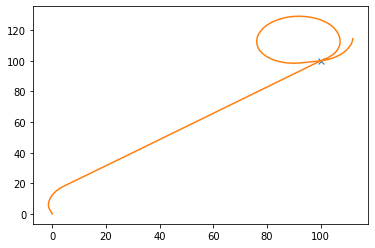

In [ ]:
initial_state = np.array([0,0,2*pi/3])
curr_state = optimizer(initial_state)
num_steps = 130
j=0
states = [initial_state]
while j <= num_steps:

  curr_state = optimizer(curr_state)
  print("\nstep: ",j,"state: ", curr_state)
  states.append(curr_state.tolist())
  j+=1

states = np.array(states)
# print(states)


import matplotlib.pyplot as plt
plt.plot(100,100,"x")
plt.plot(states.T[0],states.T[1])



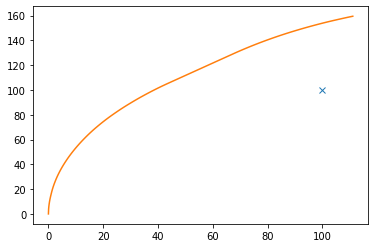